In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [222]:
%matplotlib inline
plt.style.use("fivethirtyeight")

# Initial exploration

In [223]:
df = pd.read_csv("blackjack.csv")

In [224]:
df.shape

(70000, 20)

In [225]:
df.describe()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_card_one,player_card_two,player_initial,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy
count,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4.0,6.551357,14.542971,0.506971,0.696986,18.953329,0.220943,6.532200,6.535100,14.573729,0.432614,0.567543,18.253886,0.156429,0.528314,0.071629,0.400057,0.500000
std,0.0,3.148685,4.084192,0.499955,0.811616,3.971970,0.414885,3.157579,3.158702,4.081793,0.495442,0.748018,3.793902,0.363264,0.499201,0.257874,0.489913,0.500004
min,4.0,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,4.000000,12.000000,0.000000,0.000000,17.000000,0.000000,4.000000,4.000000,12.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.0,7.000000,15.000000,1.000000,1.000000,19.000000,0.000000,7.000000,7.000000,15.000000,0.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,4.0,10.000000,18.000000,1.000000,1.000000,21.000000,0.000000,10.000000,10.000000,18.000000,1.000000,1.000000,21.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,4.0,10.000000,21.000000,1.000000,6.000000,26.000000,1.000000,10.000000,10.000000,21.000000,1.000000,6.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
df.groupby("strategy")[["player_wins"]].sum()

,player_wins
strategy,
0,13920
1,14084


## Dealer's open card

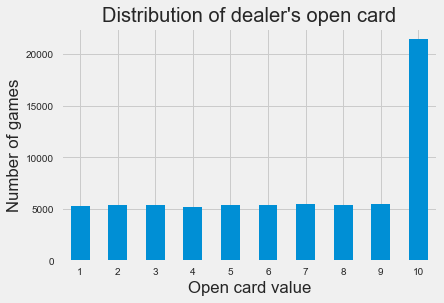

In [227]:
df["dealer_open"].value_counts(sort=False).plot(kind="bar", rot=0);
plt.xlabel("Open card value");
plt.ylabel("Number of games");
plt.title("Distribution of dealer's open card");

## Player's card one

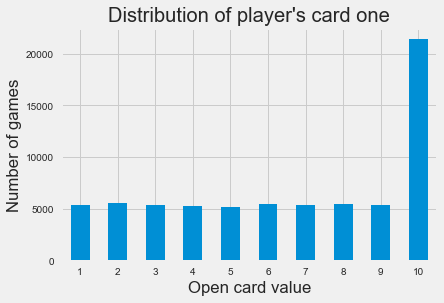

In [228]:
df["player_card_one"].value_counts(sort=False).plot(kind="bar", rot=0);
plt.xlabel("Open card value");
plt.ylabel("Number of games");
plt.title("Distribution of player's card one");

## Player's card two

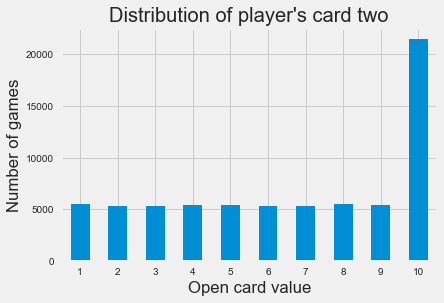

In [229]:
df["player_card_two"].value_counts(sort=False).plot(kind="bar", rot=0);
plt.xlabel("Open card value");
plt.ylabel("Number of games");
plt.title("Distribution of player's card two");

## Player's possible points

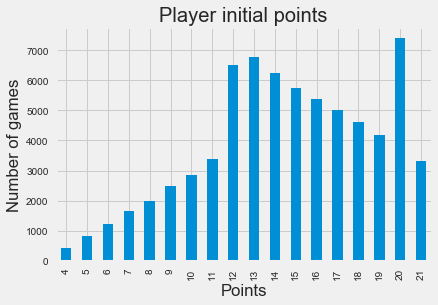

In [230]:
df.player_initial.value_counts().sort_index().plot(kind="bar");
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Player initial points");

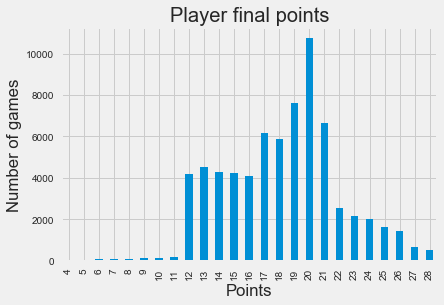

In [231]:
df.player_final.value_counts().sort_index().plot(kind="bar");
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Player final points");

## Dealer's possible points

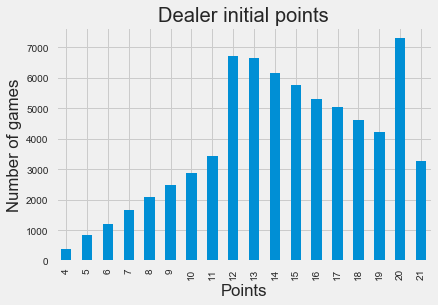

In [232]:
df.dealer_initial.value_counts().sort_index().plot(kind="bar");
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Dealer initial points");

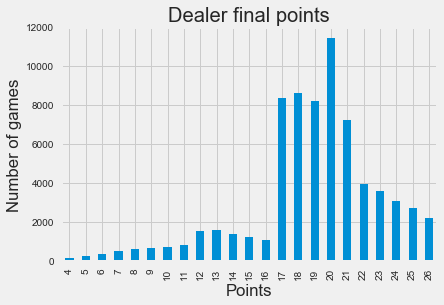

In [233]:
df.dealer_final.value_counts().sort_index().plot(kind="bar");
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Dealer final points");

## Comparison of final points

In [234]:
player_ran = df[df.strategy==0].player_final.value_counts().sort_index().to_frame()
player_ran.reset_index(inplace=True)
player_ran.columns = ["final_points", "num_games"]
dealer_ran = df[df.strategy==0].dealer_final.value_counts().sort_index().to_frame()
dealer_ran.reset_index(inplace=True)
dealer_ran.columns = ["final_points", "num_games"]

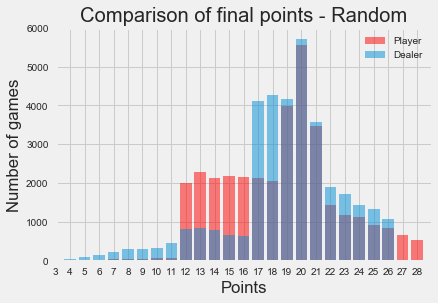

In [235]:
plt.bar(player_ran.final_points, player_ran.num_games, label="Player", 
        color="r", alpha=0.5)
plt.bar(dealer_ran.final_points, dealer_ran.num_games, label="Dealer", 
        alpha=0.5)
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Comparison of final points - Random");
plt.xlim(3,29);
plt.xticks(np.arange(3,29));
plt.legend();

In [236]:
player_rec = df[df.strategy==1].player_final.value_counts().sort_index().to_frame()
player_rec.reset_index(inplace=True)
player_rec.columns = ["final_points", "num_games"]
dealer_rec = df[df.strategy==1].dealer_final.value_counts().sort_index().to_frame()
dealer_rec.reset_index(inplace=True)
dealer_rec.columns = ["final_points", "num_games"]

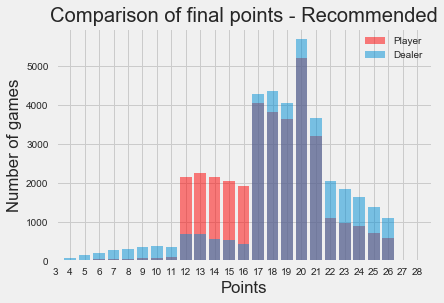

In [237]:
plt.bar(player_rec.final_points, player_rec.num_games, label="Player", 
        color="r", alpha=0.5)
plt.bar(dealer_rec.final_points, dealer_rec.num_games, label="Dealer", 
        alpha=0.5)
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Comparison of final points - Recommended");
plt.xlim(3,29);
plt.xticks(np.arange(3,29));
plt.legend();

# Recommended vs random strategy

In [238]:
result_cols = ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins"]

In [239]:
# Simulate trials of 100 games
def sim_trial(strategy=0):
    sub = df[df.strategy == strategy]
    to_get = np.random.choice(sub.index, 100)
    trials = sub.ix[to_get]
    trials = trials[result_cols]
    return pd.DataFrame(trials.sum()).T

In [240]:
sim_trial()

,dealer_busts,player_busts,player_loses,draw,player_wins
0,22,19,48,9,43


In [241]:
def n_trials(strategy=0, n=5000):
    trials = sim_trial(strategy=strategy)
    for _ in range(n-1):
        trials = pd.concat([trials, sim_trial(strategy=strategy)])
    return trials

In [242]:
ran = n_trials()
rec = n_trials(strategy=1)

In [59]:
# combine with older files
def save_file(trials, filename):
    try:
        old_trials = pd.read_csv(filename+".csv")
        trials = pd.concat([old_trials, trials])
    except:
        pass
    trials.to_csv(filename+".csv", index=False)

In [243]:
save_file(ran, "ran_trials")
save_file(rec, "rec_trials")

In [244]:
ran = pd.read_csv("ran_trials.csv")
rec = pd.read_csv("rec_trials.csv")

In [245]:
print (ran.shape)
print (rec.shape)

(5000, 5)
(5000, 5)


## Number of wins

$H_0$: There is no difference in expected number of wins for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of wins for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

- Instead of simulating trials, we'll draw random samples from the dataset that we've created

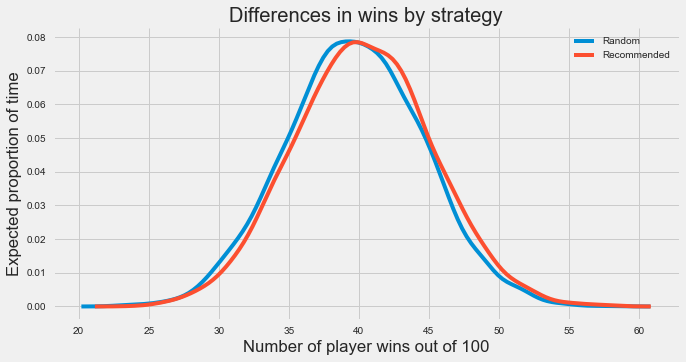

In [246]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.player_wins, 
             hist=False, label="Random");
sns.distplot(rec.player_wins, 
             hist=False, label="Recommended");
ax.set_title("Differences in wins by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of player wins out of 100");
sns.despine();

In [255]:
# Is the difference significant?
t = stats.ttest_ind(ran.player_wins, rec.player_wins)
print (t)
print (t.pvalue < 0.05)

Ttest_indResult(statistic=-5.9470147830682372, pvalue=2.8222409656009798e-09)
True


## Number of losses

$H_0$: There is no difference in expected number of losses for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of losses for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

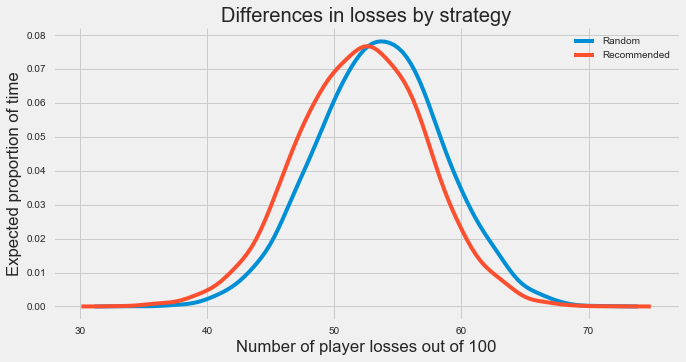

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.player_loses, 
             hist=False, label="Random");
sns.distplot(rec.player_loses, 
             hist=False, label="Recommended");
ax.set_title("Differences in losses by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of player losses out of 100");
sns.despine();

In [256]:
# Is the difference significant?
t = stats.ttest_ind(ran.player_loses, rec.player_loses)
print (t)
print (t.pvalue < 0.05)

Ttest_indResult(statistic=14.464852311117466, pvalue=6.0089541295445417e-47)
True


## Number of busts

$H_0$: There is no difference in expected number of busts for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of busts for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

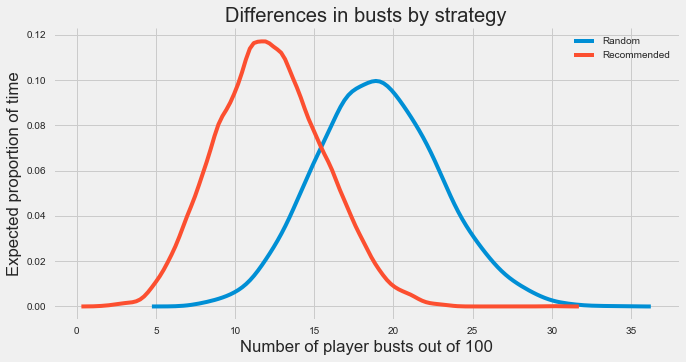

In [257]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.player_busts, 
             hist=False, label="Random");
sns.distplot(rec.player_busts, 
             hist=False, label="Recommended");
ax.set_title("Differences in busts by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of player busts out of 100");
sns.despine();

In [258]:
# Is the difference significant?
stats.ttest_ind(ran.player_busts, rec.player_busts)

Ttest_indResult(statistic=93.423570296291103, pvalue=0.0)

## What about dealer busts?

$H_0$: There is no difference in expected number of busts for the dealer between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of busts for the dealer between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

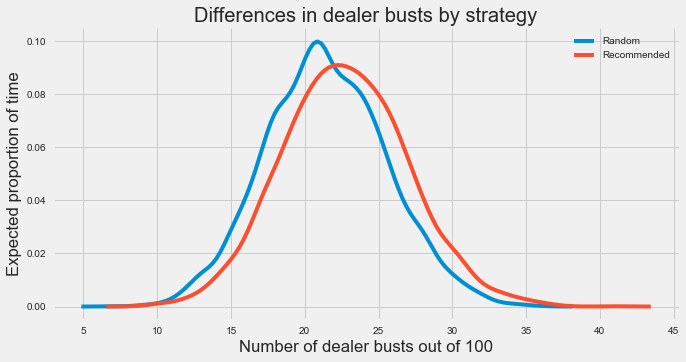

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.dealer_busts, 
             hist=False, label="Random");
sns.distplot(rec.dealer_busts, 
             hist=False, label="Recommended");
ax.set_title("Differences in dealer busts by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of dealer busts out of 100");
sns.despine();

In [260]:
# Is the difference significant?
stats.ttest_ind(ran.dealer_busts, rec.dealer_busts)

Ttest_indResult(statistic=-15.705182960305553, pvalue=6.3018146749492565e-55)

# In-depth exploration

In [261]:
df.head()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_card_one,player_card_two,player_initial,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy,dealer_hand,player_hand
0,4,2,13,1,1,20,0,10,10,20,0,0,20,0,0,1,0,0,"2,A,7","10,K"
1,4,3,13,0,0,13,0,8,8,16,1,1,26,1,1,0,0,0,"3,K","8,8,10"
2,4,5,12,1,1,22,1,10,10,20,0,0,20,0,0,0,1,0,"5,7,Q","Q,10"
3,4,10,19,0,0,19,0,9,6,15,0,0,15,0,1,0,0,0,"10,9","9,6"
4,4,10,17,0,0,17,0,10,4,14,1,1,19,0,0,0,1,0,"J,7","10,4,5"


In [262]:
score_cols = ["player_loses", "draw", "player_wins"]

## Is splitting 8's always better than just keeping them?

- And does the strategy affect that?

In [263]:
def get_combi(cards):
    card_list = list(cards)
    card_list.sort()
    card_list = [str(i) for i in card_list]
    return "".join(card_list)

In [264]:
def get_other(cards, number):
    card_list = list(cards)
    card_list.remove(number)
    return card_list[0]

In [265]:
eights = df.copy()
eights = eights[(df.player_card_one == 8) | (df.player_card_two == 8)]
eights = eights[["player_card_one", "player_card_two", "player_wins", "strategy"]]
eights.reset_index(drop=True, inplace=True)

In [266]:
eights["combination"] = eights[["player_card_one", "player_card_two"]].apply(get_combi, axis=1)

In [267]:
eights.head()

,player_card_one,player_card_two,player_wins,strategy,combination
0,8,8,0,0,88
1,8,3,1,0,38
2,8,10,0,0,810
3,8,6,0,0,68
4,8,10,0,0,810


In [268]:
eights.shape

(10566, 5)

In [269]:
for i in range(eights.shape[0]):
    eights.ix[i, "other"] = get_other(eights[["player_card_one", "player_card_two"]].ix[i], 8)

In [270]:
eights["other"] = eights["other"].astype(int)

In [271]:
eights.head()

,player_card_one,player_card_two,player_wins,strategy,combination,other
0,8,8,0,0,88,8
1,8,3,1,0,38,3
2,8,10,0,0,810,10
3,8,6,0,0,68,6
4,8,10,0,0,810,10


In [272]:
eights.other.value_counts()

10    3333
5      910
1      872
4      861
2      861
6      857
9      835
3      828
7      820
8      389
Name: other, dtype: int64

In [273]:
eights.head()

,player_card_one,player_card_two,player_wins,strategy,combination,other
0,8,8,0,0,88,8
1,8,3,1,0,38,3
2,8,10,0,0,810,10
3,8,6,0,0,68,6
4,8,10,0,0,810,10


In [274]:
e_wins = eights.groupby(["strategy", "other"])["player_wins"].agg([sum, len])

In [275]:
e_wins

sum   len
strategy other           
0        1      238   435
         2      199   413
         3      214   442
         4      136   440
         5      137   490
         6      108   437
         7       99   408
         8       58   200
         9       84   415
         10     503  1669
1        1      243   437
         2      233   448
         3      201   386
         4       96   421
         5       99   420
         6       95   420
         7       93   412
         8       36   189
         9      133   420
         10     719  1664

In [276]:
e_wins["prob"] = e_wins["sum"]/e_wins["len"]

In [277]:
e_wins.reset_index(inplace=True)

In [278]:
ran = e_wins[e_wins["strategy"]==0].reset_index()
rec = e_wins[e_wins["strategy"]==1].reset_index()

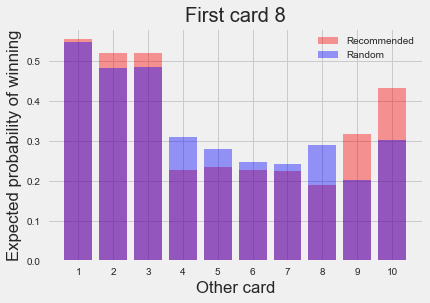

In [279]:
plt.bar(rec["other"], rec["prob"], 
        color="r", alpha=0.4, label="Recommended");
plt.bar(ran["other"], ran["prob"], 
        color="b", alpha=0.4, label="Random");
plt.title("First card 8");
plt.xticks(e_wins["other"].unique())
plt.xlabel("Other card");
plt.ylabel("Expected probability of winning");
plt.legend();

In [280]:
for i in range(1,11):
    if i != 8:
        r = stats.ttest_ind(eights["player_wins"][eights["other"]==i], eights["player_wins"][eights["other"]==8])
        if r.pvalue < 0.05:
            msg = "rejected."
        else:
            msg = "not rejected."
        print ("Null hypothesis: There is no difference in wins whether your second card is {} or 8.\nSignificance level = 5%".format(i))
        print ("Other card: {}\np-value: {:.6f}\np-value < 5%: {}\nNull hypothesis {}\n".format(i, r.pvalue, r.pvalue < 0.05, msg))

Null hypothesis: There is no difference in wins whether your second card is 1 or 8.
Significance level = 5%
Other card: 1
p-value: 0.000000
p-value < 5%: True
Null hypothesis rejected.

Null hypothesis: There is no difference in wins whether your second card is 2 or 8.
Significance level = 5%
Other card: 2
p-value: 0.000000
p-value < 5%: True
Null hypothesis rejected.

Null hypothesis: There is no difference in wins whether your second card is 3 or 8.
Significance level = 5%
Other card: 3
p-value: 0.000000
p-value < 5%: True
Null hypothesis rejected.

Null hypothesis: There is no difference in wins whether your second card is 4 or 8.
Significance level = 5%
Other card: 4
p-value: 0.300237
p-value < 5%: False
Null hypothesis not rejected.

Null hypothesis: There is no difference in wins whether your second card is 5 or 8.
Significance level = 5%
Other card: 5
p-value: 0.502576
p-value < 5%: False
Null hypothesis not rejected.

Null hypothesis: There is no difference in wins whether your

### What about other numbers

In [281]:
def test_doubles(number):
    num_df = df.copy()
    num_df = num_df[(num_df["player_card_one"]==number) | (num_df["player_card_two"]==number)]
    num_df = num_df[["player_card_one", "player_card_two", "player_wins", "strategy"]]
    num_df.reset_index(drop=True, inplace=True)
    num_df["combination"] = num_df[["player_card_one", "player_card_two"]].apply(get_combi, axis=1)

    for i in range(num_df.shape[0]):
        num_df.ix[i, "other"] = get_other(num_df[["player_card_one", "player_card_two"]].ix[i], number)
    
    num_wins = num_df.groupby(["strategy", "other"])["player_wins"].agg([sum, len])
    num_wins["prob"] = num_wins["sum"]/num_wins["len"]
    num_wins.reset_index(inplace=True)
    
    ran = num_wins[num_wins["strategy"]==0].reset_index()
    rec = num_wins[num_wins["strategy"]==1].reset_index()
    
    plt.bar(rec["other"], rec["prob"], 
        color="r", alpha=0.4, label="Recommended");
    plt.bar(ran["other"], ran["prob"], 
            color="b", alpha=0.4, label="Random");
    plt.title("First card {}".format(number));
    plt.xticks(num_wins["other"].unique())
    plt.xlabel("Other card");
    plt.ylabel("Expected probability of winning");
    plt.legend(loc="best");
    plt.show()
    
#     for i in range(1,11):
#         if i != number:
#             r = stats.ttest_ind(num_df["player_wins"][num_df["other"]==i], num_df["player_wins"][num_df["other"]==number])
#             if r.pvalue < 0.05:
#                 msg = "rejected."
#             else:
#                 msg = "not rejected."
#             print ("Null hypothesis: There is no difference in wins whether your second card is {} or {}.\nSignificance level = 5%".format(i, number))
#             print ("Other card: {}\np-value: {:.6f}\np-value < 5%: {}\nNull hypothesis {}\n".format(i, r.pvalue, r.pvalue < 0.05, msg))

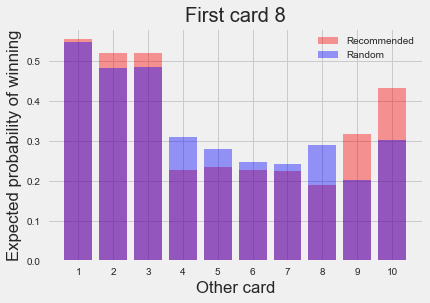

In [282]:
test_doubles(8)

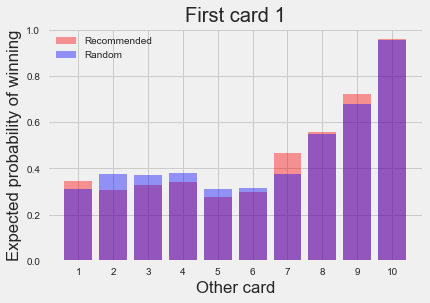

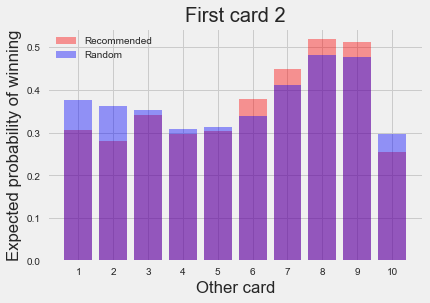

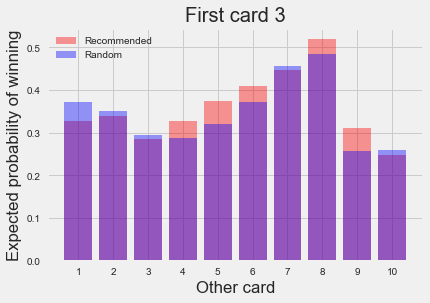

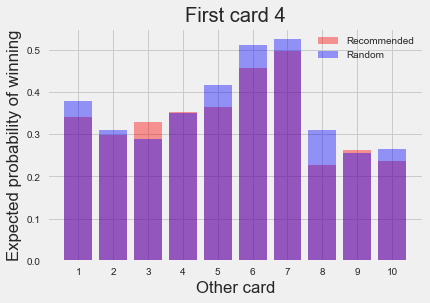

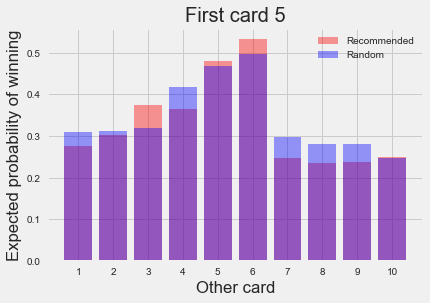

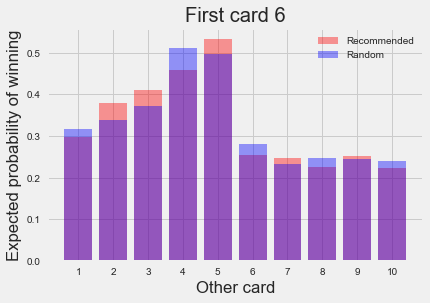

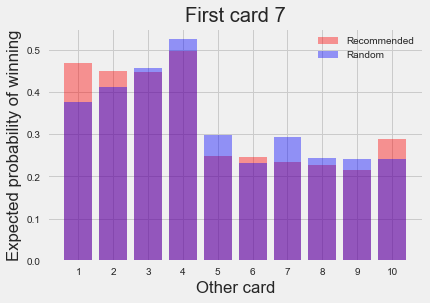

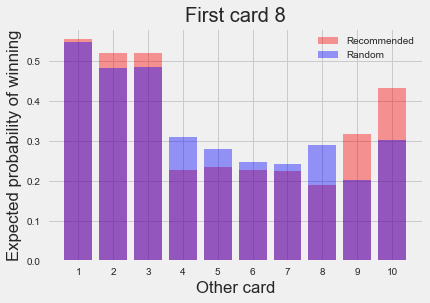

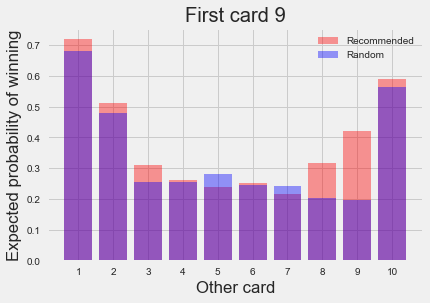

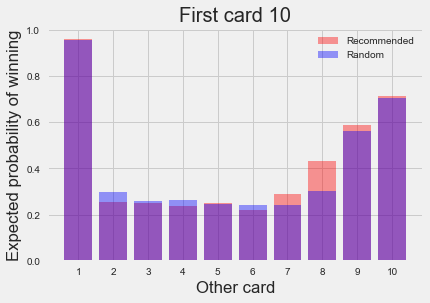

In [283]:
for i in range(1,11):
    test_doubles(i)

### Understanding the bar charts

- Each bar represents the player's '2nd' card
- The height of the bar is the expected probability that the player wins given that his 2 cards are A and B
    - i.e. If you have cards A and B, what's your chance of winning
- E.g. If you have 10 and 9, there's about a 55% chance that you will win
- This doesn't take into account what the dealer's open card it
- The higher the bar, the better the combination as compared to the other combinations in that chart

### Findings

- It's always better to split Aces
- There's a chance that splitting 2s will improve your chances of winning, but only if your next cards are 8 or 9
- Same for 3s, if your next cards are 7 or 8
- As for 4s, if your next cards are 5, 6 or 7
- Never split 5s
    - If you're holding two 5s, you have a better chance of winning than if you're holding any other combination with a 5
- If you're playing by the recommended strategy, splitting 6s will be better if your next cards are 5 or below
- As for 7s, if your next cards are 4 or below
    - If your next cards are 8 or 10, you have a slightly better chance too
- Splitting 8s always increases your chances of winning
    - But it increases much more if your next cards are 3 or below
- Splitting 9s only work if your next cards are Ace, 2 or 10
- Splitting 10s is never a good idea
    - There's a very low chance that you'll get an Ace next

## Do we always do better when hitting on 12-16's?

In [284]:
sub1216 = df.copy()

In [285]:
sub1216 = sub1216[sub1216["player_initial"] >= 12]
sub1216 = sub1216[sub1216["player_initial"] <= 16]
sub1216.reset_index(inplace=True)

In [286]:
results1216 = sub1216.groupby(["player_hit"])["player_wins"].agg([sum,len])
results1216.reset_index(inplace=True)
results1216

,player_hit,sum,len
0,0,4074,16765
1,1,3984,13888


In [287]:
results1216["win_prob"] = results1216["sum"]/results1216["len"]

In [288]:
results1216

,player_hit,sum,len,win_prob
0,0,4074,16765,0.243006
1,1,3984,13888,0.286866


In [289]:
stats.ttest_ind(sub1216["player_wins"][sub1216["player_hit"] == 0], 
                sub1216["player_wins"][sub1216["player_hit"] == 1])

Ttest_indResult(statistic=-8.6941791359378495, pvalue=3.6643219917091765e-18)

## Do we always do worse when hitting on 17's and above?

In [290]:
sub17 = df.copy()

In [291]:
sub17 = sub17[sub17["player_initial"] >= 17]
sub17.reset_index(inplace=True)

In [292]:
results17 = sub17.groupby("player_hit")["player_wins"].agg([sum, len])
results17.reset_index(inplace=True)

In [293]:
results17

,player_hit,sum,len
0,0,13367,22248
1,1,518,2309


In [294]:
results17["win_prob"] = results17["sum"]/results17["len"]

In [295]:
results17

,player_hit,sum,len,win_prob
0,0,13367,22248,0.600818
1,1,518,2309,0.224340


In [296]:
stats.ttest_ind(sub17["player_wins"][sub17["player_hit"] == 0], 
                sub17["player_wins"][sub17["player_hit"] == 1])

Ttest_indResult(statistic=35.621537437446946, pvalue=5.0949111084971396e-271)

## Chance of winning
Disregarding the recommended strategy, given the dealer's open card and your current points, what's your chance of winning?

In [370]:
sub = df[df.strategy==0].groupby(["dealer_open", "player_initial", "player_hit"])["player_wins"].agg([sum, len])
sub.reset_index(inplace=True)
sub["win_prob"] = sub["sum"]/sub["len"]
sub["p_hit"] = sub["player_hit"].apply(lambda x: "Stand" if x == 0 else "Hit")
sub.head()

,dealer_open,player_initial,player_hit,sum,len,win_prob,p_hit
0,1,4,0,0,5,0.000000,Stand
1,1,4,1,3,9,0.333333,Hit
2,1,5,0,0,10,0.000000,Stand
3,1,5,1,5,18,0.277778,Hit
4,1,6,0,0,10,0.000000,Stand


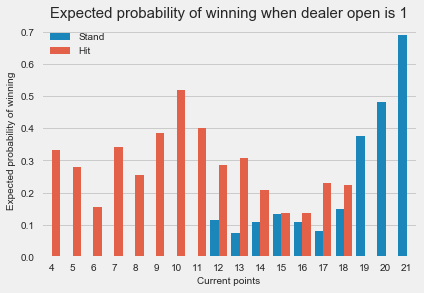

In [371]:
sns.barplot(x="player_initial", y="win_prob", hue="p_hit", data=sub[(sub["dealer_open"] == 1)]);
plt.title("Expected probability of winning when dealer open is {}".format(1), fontsize=15);
plt.ylabel("Expected probability of winning", fontsize=10);
plt.xlabel("Current points", fontsize=10);
plt.legend();

In [372]:
def open_compare(open_card):
    sns.barplot(x="player_initial", y="win_prob", hue="p_hit", data=sub[(sub["dealer_open"] == open_card)]);
    plt.title("Expected probability of winning when dealer open is {}".format(open_card), fontsize=15);
    plt.ylabel("Expected probability of winning", fontsize=10);
    plt.xlabel("Current points", fontsize=10);
    plt.legend();
    plt.show();

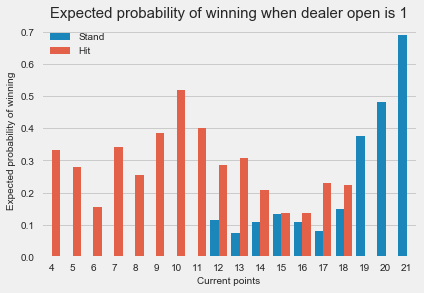

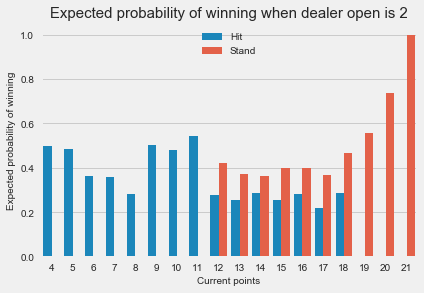

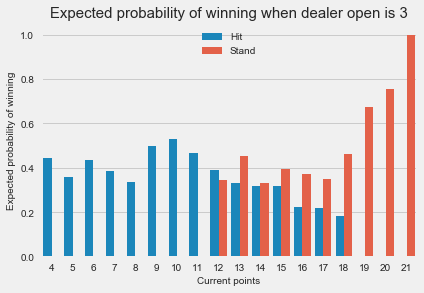

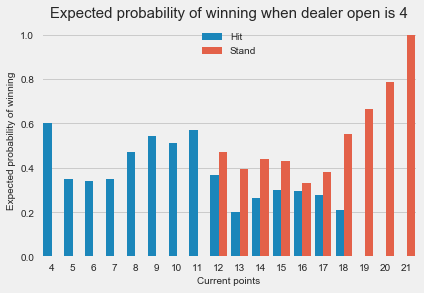

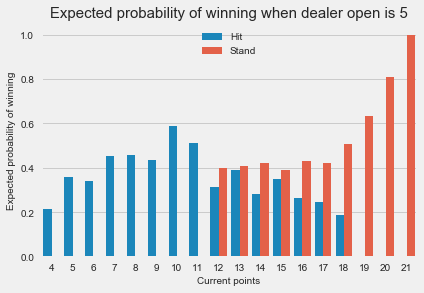

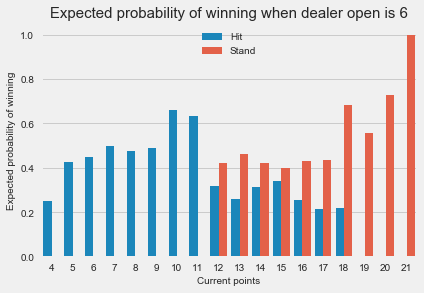

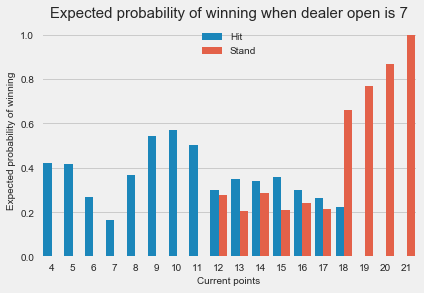

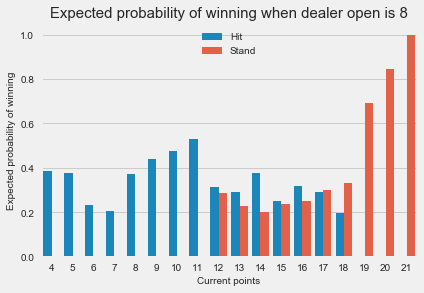

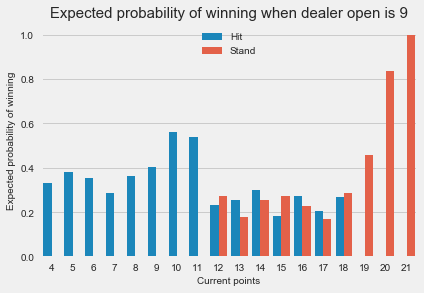

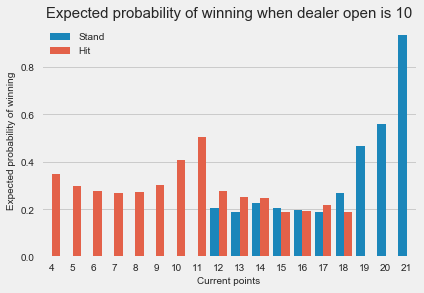

In [373]:
for i in range(1, 11):
    open_compare(i)

In [374]:
def points_compare(points):
    sns.barplot(x="dealer_open", y="win_prob", hue="p_hit", data=sub[(sub["player_initial"] == points)]);
    plt.title("Expected probability of winning when {} points".format(points), fontsize=15);
    plt.ylabel("Expected probability of winning", fontsize=10);
    plt.xlabel("Dealer open", fontsize=10);
    plt.legend();
    plt.show();

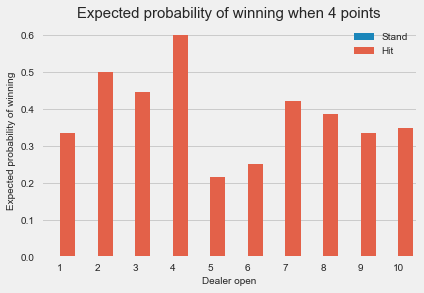

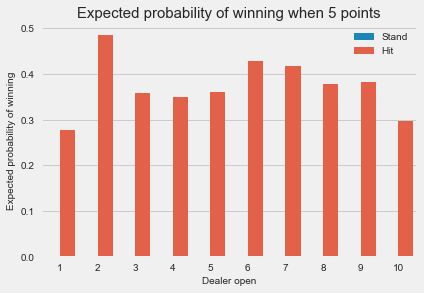

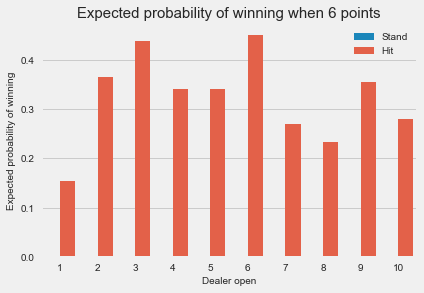

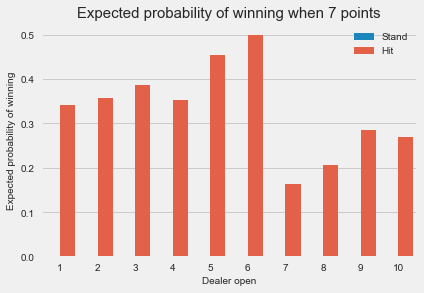

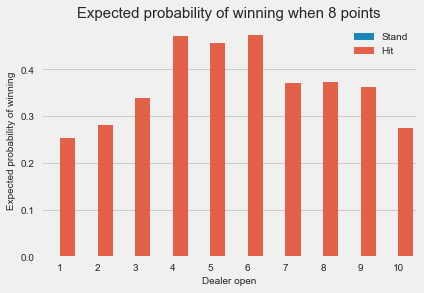

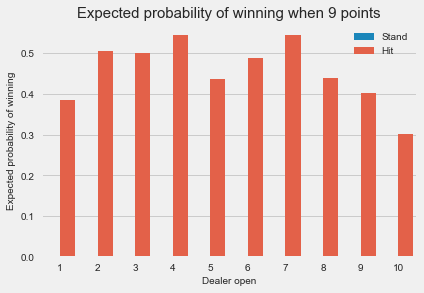

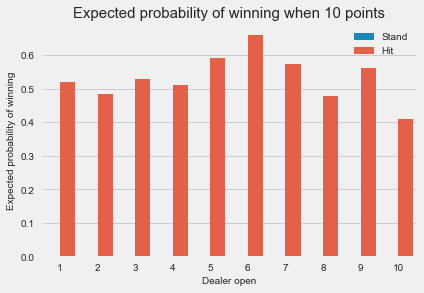

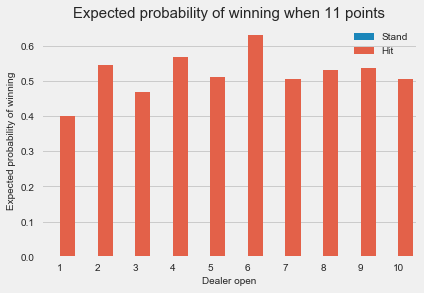

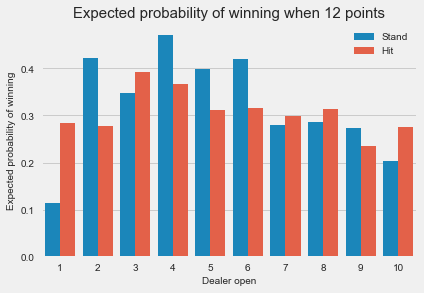

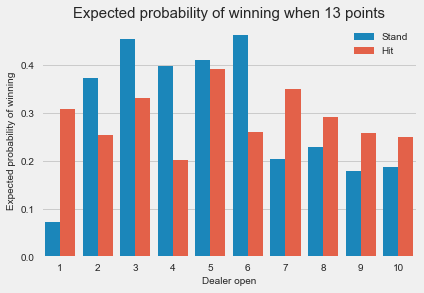

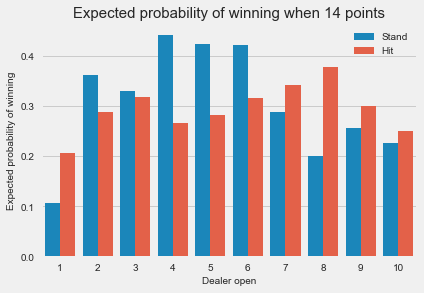

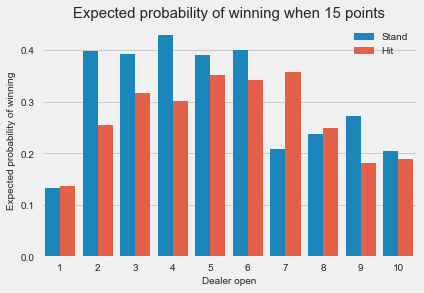

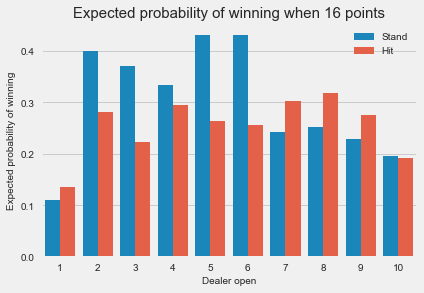

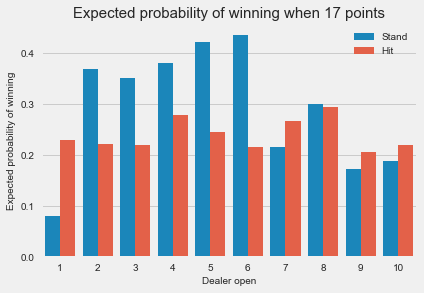

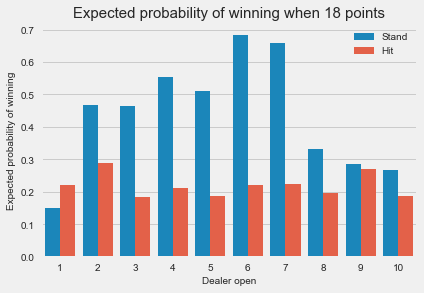

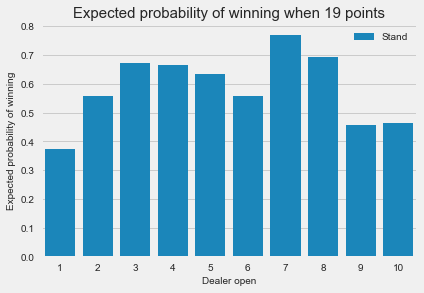

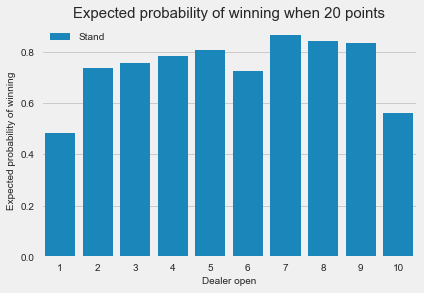

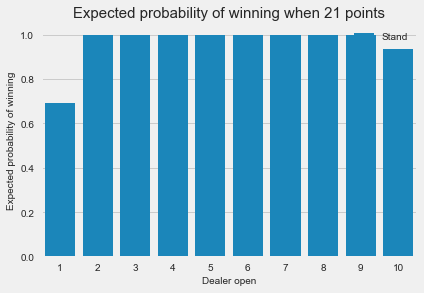

In [375]:
for i in range(4,22):
    points_compare(i)

- Below 11, always hit
- 18 and above, always stand
- 12, stand on 2, 4, 5, 6
- 13-17, stand from 2 to 6

## Comparing the hitting and standing

In [390]:
def diff_hs(p_i, d_o):
    sub = df[(df.player_initial == p_i) & (df.dealer_open == d_o)]
    t = stats.ttest_ind(sub["player_wins"][sub["player_hit"] == 0], sub["player_wins"][sub["player_hit"] == 1])
#     print ("Player points: {}\nDealer open: {}".format(p_i, d_o))
#     print (t)
#     print ("P-value below 5%: {}\n".format(t.pvalue < 0.05))
    if len(sub[sub["player_hit"]==0]) == 0 or len(sub[sub["player_hit"]==1]) == 0:
        return [p_i, d_o, True]
    else:
        return [p_i, d_o, t.pvalue < 0.05]

In [391]:
sig_tests = []
for i in range(1,11):
    for j in range(4, 22):
        sig_tests.append(diff_hs(j, i))

In [392]:
sig_tests = pd.DataFrame(sig_tests, columns=["player_initial", "dealer_open", "sig_diff"])

In [393]:
sig_tests.tail()

,player_initial,dealer_open,sig_diff
175,17,10,False
176,18,10,True
177,19,10,True
178,20,10,True
179,21,10,True


In [394]:
sub = df[(df.player_initial == 11) & (df.dealer_open == 10)]
t = stats.ttest_ind(sub["player_wins"][sub["player_hit"] == 0], sub["player_wins"][sub["player_hit"] == 1])
type(t.pvalue)

numpy.float64

In [395]:
sig_diff = sig_tests[sig_tests.sig_diff == True].sort_values(by="player_initial")
sig_diff.reset_index(inplace=True, drop=True)
sig_diff.head()

,player_initial,dealer_open,sig_diff
0,4,8,True
1,4,10,True
2,4,4,True
3,4,5,True
4,4,2,True


# Potentially

- hit or stand (depending on which result is better) when the difference is statistically significant
    - player_initial
    - dealer_open
    - better results (hit or stand)
    - significant difference (true or false)

In [396]:
sub = df[df.strategy == 0].copy()
sub = sub.groupby(["player_initial", "dealer_open", "player_hit"])["player_wins"].agg([sum,len]).reset_index()
sub["prob_win"] = sub["sum"]/sub["len"]

In [397]:
sub.head()

,player_initial,dealer_open,player_hit,sum,len,prob_win
0,4,1,0,0,5,0.000000
1,4,1,1,3,9,0.333333
2,4,2,1,4,8,0.500000
3,4,3,1,8,18,0.444444
4,4,4,1,9,15,0.600000


In [398]:
sub2 = pd.pivot_table(sub, values="prob_win", columns="player_hit", index=["player_initial", "dealer_open"]).reset_index()

In [399]:
sub2.head()

player_hit,player_initial,dealer_open,0,1
0,4,1,0.0,0.333333
1,4,2,NaN,0.500000
2,4,3,NaN,0.444444
3,4,4,NaN,0.600000
4,4,5,NaN,0.214286


In [400]:
sub2["better"] = sub2[1] > sub2[0]
sub2["better"] = sub2["better"].apply(lambda x: "hit" if x else "stand")

In [401]:
sub2.head()

player_hit,player_initial,dealer_open,0,1,better
0,4,1,0.0,0.333333,hit
1,4,2,NaN,0.500000,stand
2,4,3,NaN,0.444444,stand
3,4,4,NaN,0.600000,stand
4,4,5,NaN,0.214286,stand


In [402]:
moves = sig_tests.merge(sub2, on=["player_initial", "dealer_open"])
del moves[0]
del moves[1]

In [403]:
moves.sort_values(by=["player_initial", "dealer_open"])

,player_initial,dealer_open,sig_diff,better
0,4,1,False,hit
18,4,2,True,stand
36,4,3,True,stand
54,4,4,True,stand
72,4,5,True,stand
90,4,6,True,stand
108,4,7,True,stand
126,4,8,True,stand
144,4,9,True,stand
162,4,10,True,hit
